In [2]:
import os
import numpy as np
import mne

In [1]:
import os
import mne

# Assuming "emotions.csv" is a custom data file, not part of the MNE sample dataset
data_folder = r"C:\Users\rudra\Desktop"
emotions_file = os.path.join(data_folder, "mental-state.csv")

# Assuming the "sample_audvis_filt-0-40_raw.fif" file is part of the MNE sample dataset
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, "MEG", "sample", "sample_audvis_filt-0-40_raw.fif")

# Read the raw data file
raw = mne.io.read_raw_fif(sample_data_raw_file)

# Pick EEG channels and exclude bad channels
raw = raw.pick_types(meg=False, eeg=True, eog=False, exclude="bads")

Opening raw data file C:\Users\rudra\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


In [3]:
print(raw.info)

<Info | 14 non-empty values
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>


In [4]:
raw.crop(0, 60) # taking a 60 segment of frequency 0-40Hz

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 9010 (60.0 s), ~2.9 MB, data not loaded>

Using matplotlib as 2D backend.


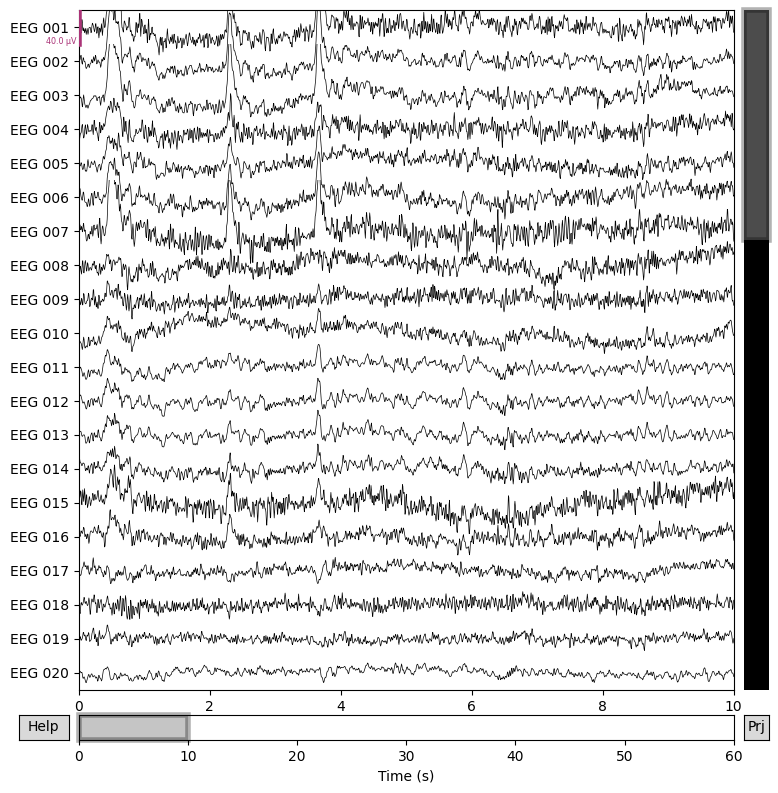

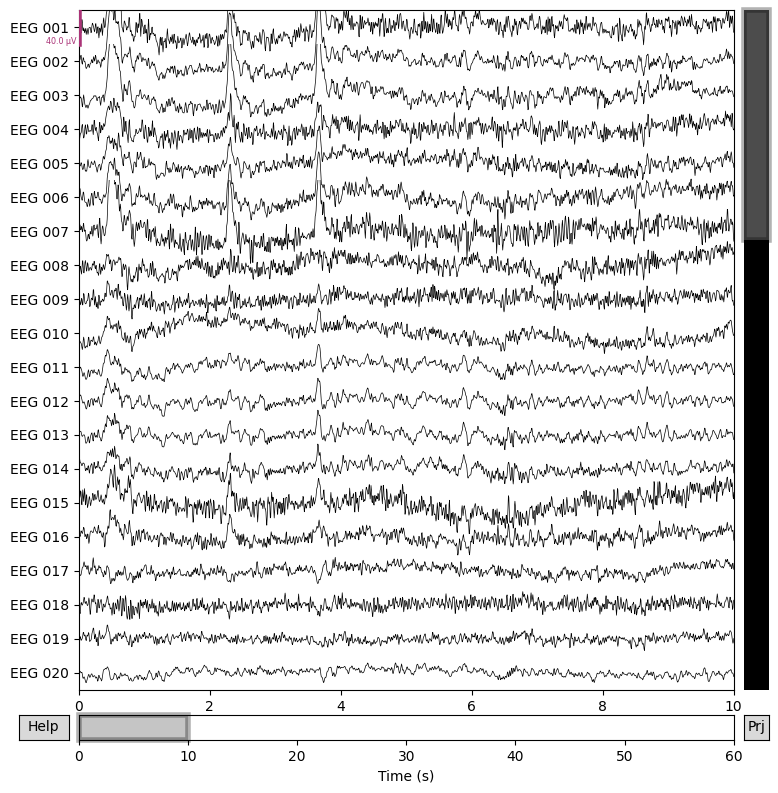

In [5]:
raw.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


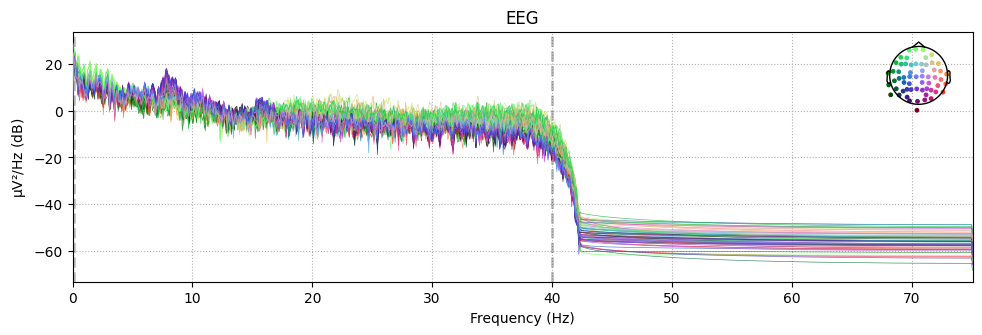

In [6]:
raw.plot_psd()   # plotting power spectral density curve.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
eeg_data = pd.read_csv(r"mental-state.csv")

# Create a pandas DataFrame

df = pd.DataFrame(eeg_data)



In [9]:
df.head()  #printing first 5 rows

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0


In [10]:
df.describe()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,...,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,23.584351,27.060411,20.452931,11.526044,0.014449,0.003397,0.554037,0.103880,23.271148,26.809551,...,0.008141,0.008063,0.007784,0.007679,0.007413,0.007998,0.007449,0.007307,0.007382,1.004437
std,10.543938,24.252348,72.104439,19.196870,13.382998,39.383221,97.200697,14.461716,17.639164,36.255490,...,0.007653,0.007572,0.007458,0.007276,0.007060,0.007547,0.006937,0.007379,0.007276,0.815743
min,-35.224945,-369.150109,-579.490660,-251.495367,-75.143730,-728.743981,-1048.773622,-96.231800,-351.810178,-800.320690,...,0.000036,0.000024,0.000018,0.000027,0.000052,0.000041,0.000008,0.000036,0.000048,0.000000
25%,18.732076,21.328936,17.124174,6.541236,-4.647636,-3.342428,-6.773096,-4.498267,17.020349,20.684966,...,0.002192,0.002169,0.002108,0.002151,0.001930,0.002034,0.001985,0.002042,0.001964,0.000000
50%,23.553828,27.574535,25.217098,15.144375,-0.140909,0.180963,0.144378,-0.180041,23.761987,27.442672,...,0.006239,0.006029,0.005735,0.005632,0.005532,0.006005,0.005717,0.005300,0.005315,1.000000
75%,27.759551,32.247539,30.746496,20.589852,3.965898,3.594742,7.305102,4.146319,29.574478,32.720855,...,0.011497,0.011610,0.010986,0.011150,0.010645,0.011406,0.010768,0.010208,0.010330,2.000000
max,92.313766,408.180215,591.014113,69.694520,104.963158,512.648208,896.171353,172.660240,116.412065,539.925670,...,0.069699,0.058378,0.086914,0.065296,0.053044,0.054104,0.060196,0.134037,0.071582,2.000000


In [11]:
df.dropna() # removing NaN values from DF

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,15.762328,19.113555,23.696867,7.568395,-6.503336,6.867187,-11.955396,-16.519912,19.838319,14.333094,...,0.008537,0.008941,0.004102,0.003156,0.003659,0.010179,0.004591,0.013817,0.004536,0.0
2475,34.675582,34.200645,-57.624820,-4.825609,7.382353,2.324416,-1.341208,-4.178625,26.383597,28.782987,...,0.003324,0.003593,0.001702,0.003121,0.002686,0.001645,0.001770,0.001038,0.001973,2.0
2476,29.813809,29.623031,-86.503988,7.532121,-19.581287,-0.628400,133.947160,-2.049096,45.484851,32.163999,...,0.000754,0.000508,0.000263,0.000701,0.000797,0.001096,0.000388,0.000529,0.001079,2.0
2477,59.453973,17.944332,-10.164238,42.568211,-1.300655,-19.993690,-54.331696,12.947622,55.203380,40.228490,...,0.003332,0.003557,0.004063,0.001662,0.002665,0.002353,0.003976,0.001660,0.003229,2.0


In [12]:
X = df.drop(['Label'], axis=1)   # All columns except Labels are kept in X
y = df['Label']                 # Labels are kept in y

In [13]:
#splitting Dataset into training and testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85)  

In [14]:
# Extracting Power Spectral Density anf Frequency domain features.
psd, freqs = mne.time_frequency.psd_array_multitaper(X_train.values.T, sfreq=256, fmin=1, fmax=40, n_jobs=1, verbose=0)

In [15]:
'''import matplotlib.pyplot as plt
sample = df.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("EEG Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()
'''



'import matplotlib.pyplot as plt\nsample = df.loc[0, \'fft_0_b\':\'fft_749_b\']\nplt.figure(figsize=(16, 10))\nplt.plot(range(len(sample)), sample)\nplt.title("EEG Time-Series Data")\nplt.xlabel("Time")\nplt.ylabel("Amplitude")\nplt.show()\n'

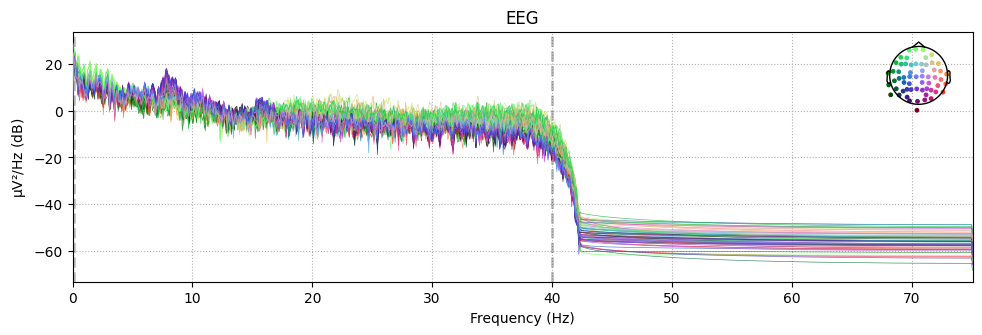

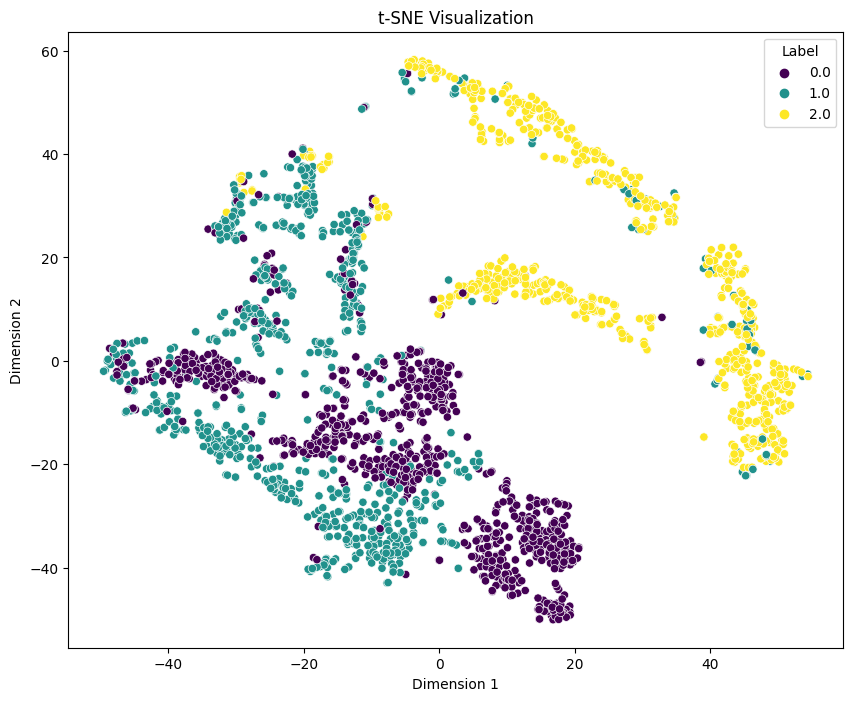

In [17]:
# t-SNE Visualization
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df.drop('Label', axis=1))

tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Label'] =df["Label"]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Label', data=tsne_df, palette='viridis')
plt.title("t-SNE Visualization")
plt.show()

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
'''
#from scipy import signals
sampling_rate = 1233  # Replace with your EEG data's sampling rate
import scipy
# Spectral Analysis
frequencies, power_density = scipy.signal.welch(raw, fs=sampling_rate)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_density)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency")
plt.grid()
plt.show()
'''

'\n#from scipy import signals\nsampling_rate = 1233  # Replace with your EEG data\'s sampling rate\nimport scipy\n# Spectral Analysis\nfrequencies, power_density = scipy.signal.welch(raw, fs=sampling_rate)\nplt.figure(figsize=(10, 6))\nplt.semilogy(frequencies, power_density)\nplt.title("Power Spectral Density")\nplt.xlabel("Frequency (Hz)")\nplt.ylabel("Power/Frequency")\nplt.grid()\nplt.show()\n'

In [25]:
import scipy 
import seaborn as sns

Model: Random Forest
Confusion Matrix:
[[135   5   0]
 [  0 111   3]
 [  0   0 118]]
Accuracy: 0.978494623655914


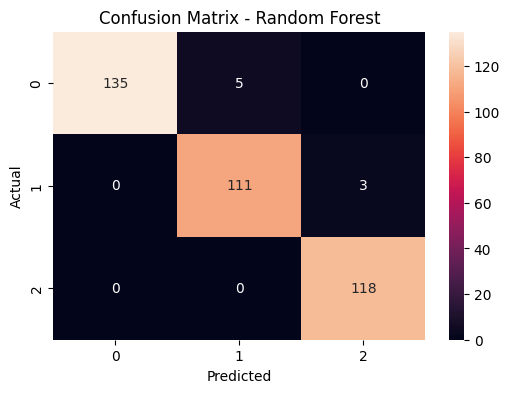

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       140
         1.0       0.96      0.97      0.97       114
         2.0       0.98      1.00      0.99       118

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372

Model: DecisionTree
Confusion Matrix:
[[128  11   1]
 [ 13  96   5]
 [  0   7 111]]
Accuracy: 0.9005376344086021


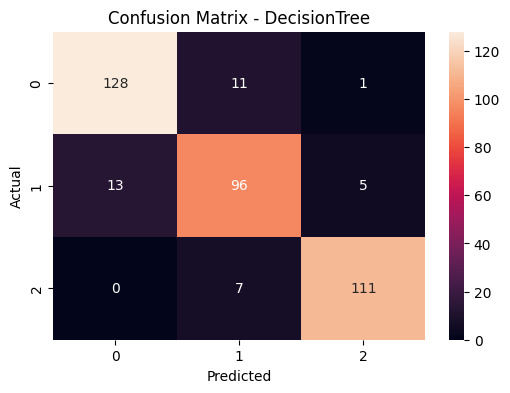

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       140
         1.0       0.84      0.84      0.84       114
         2.0       0.95      0.94      0.94       118

    accuracy                           0.90       372
   macro avg       0.90      0.90      0.90       372
weighted avg       0.90      0.90      0.90       372

Model: KNN
Confusion Matrix:
[[131   8   1]
 [ 11  96   7]
 [  0   4 114]]
Accuracy: 0.9166666666666666


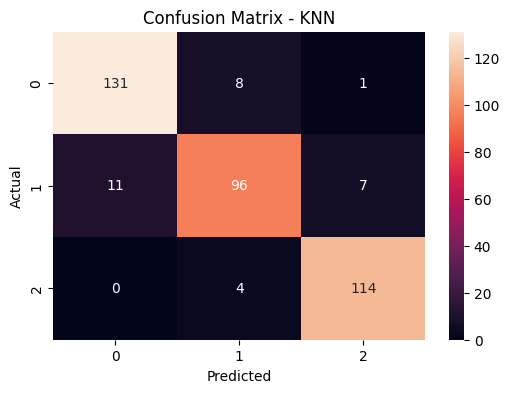

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       140
         1.0       0.89      0.84      0.86       114
         2.0       0.93      0.97      0.95       118

    accuracy                           0.92       372
   macro avg       0.92      0.91      0.91       372
weighted avg       0.92      0.92      0.92       372

Model: MLPClassifier
Confusion Matrix:
[[127  11   2]
 [  9 104   1]
 [  2   3 113]]
Accuracy: 0.9247311827956989


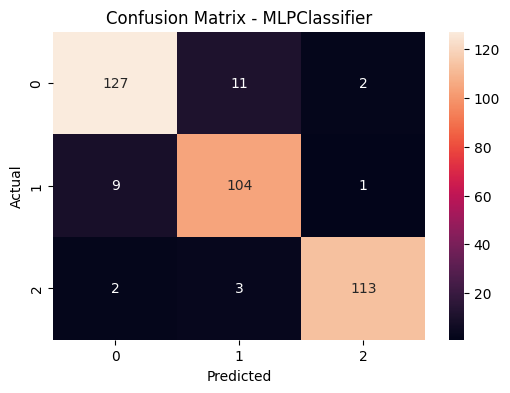

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       140
         1.0       0.88      0.91      0.90       114
         2.0       0.97      0.96      0.97       118

    accuracy                           0.92       372
   macro avg       0.93      0.93      0.93       372
weighted avg       0.93      0.92      0.92       372

The best performing classifier is: Random Forest with an accuracy of 0.98


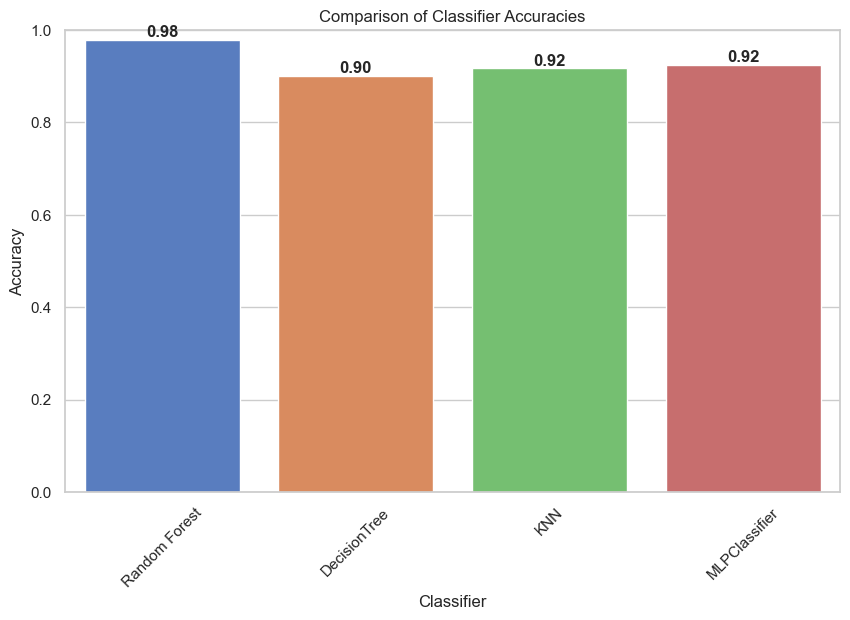

In [26]:
#Creating a dictionary to store model name as key and model function as value.

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=3000),
    "DecisionTree" : DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(64,),activation = "relu"),
    #"SVM": SVC(kernel="linear"),
    #"AdaBoost" : AdaBoostClassifier(n_estimators=100, random_state=40),
    #"XGBoost": XGBClassifier()
}

accuracies = []  # Store the accuracies of all models
best_model = None #Stores Best model name
best_accuracy = 0 #Stores best model Accuracy.

for model_name, model in models.items():
    print(f"Model: {model_name}")
    print("=" * 30)

    # Fit the model
    model.fit(X_train, y_train)
    X_test_processed = X_test

    # Predict on the test set
    y_pred = model.predict(X_test_processed)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)  # Store the accuracy for later plotting
    print("Accuracy:", accuracy)

    # Plotting the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d",)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    print("=" * 30)

    # Check if the current model has better accuracy
    if accuracy > best_accuracy:
        best_model = model_name
        best_accuracy = accuracy

print(f"The best performing classifier is: {best_model} with an accuracy of {best_accuracy:.2f}")

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting the histogram of accuracies with beautiful aesthetics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(models.keys()), y=accuracies, palette="muted")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure the scale is from 0 to 1
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility

# Add accuracy labels on top of each bar
for i, acc in enumerate(accuracies):
    ax.text(i, acc, f"{acc:.2f}", ha='center', va='bottom', fontweight='bold')

plt.show()


Accuracy: 98.92%
Confusion Matrix: [[127   2   0]
 [  0 127   2]
 [  0   0 114]]


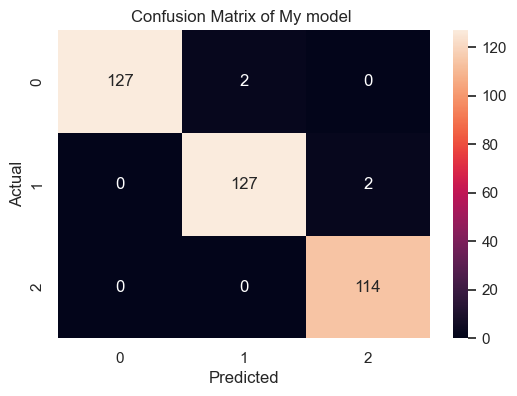

In [45]:

# Ensure class labels start from 0
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85)
y_train = y_train - min(y_train)
y_test = y_test - min(y_test)
import xgboost as xgb

# Define a custom base learner using RandomForestClassifier
class RandomForestBaseLearner:
    def __init__(self, num_estimators=100, max_depth=None):
        self.num_estimators = num_estimators
        self.max_depth = max_depth
        self.model = None

    def fit(self, X, y):
        self.model = RandomForestClassifier(n_estimators=self.num_estimators, max_depth=self.max_depth)
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Create an XGBoost classifier with the custom base learner
xgb_custom_base = xgb.XGBClassifier(
    base_score=0.5,
    booster="gbtree",
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,  # Maximum depth of the trees
    learning_rate=0.1
)

# Fit the XGBoost model with the custom base learner
xgb_custom_base.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_custom_base.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d",)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of My model ")
plt.show()